Milestone 1 - Visualization - King County House Data
Author - Ajai Shukla
Problem Statement:
A developer interest in acquiring properties in King County Washington is interested in what home features (zip code, structure, and so on) would yield a high price.
Instructions
Generate a clear statement problem and provide location for dataset
Provide a clear solution to the problem for a non-technical audience
Visually explore the data to generate insight and include summary statistics

Setup

In [5]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
url = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv"
house_df = pd.read_csv(url)

Initial Exploration

In [6]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [8]:
# convet to date to datetime
house_df['date'] = pd.to_datetime(house_df['date'])

In [9]:
# look for any null values
house_df.isnull().values.any()

False

In [10]:
# investigate outliers in bedrooms - this was noticed in the pairplots and then moved here to improve results
house_df.loc[house_df['bedrooms'] > 12, 'bedrooms']

15870    33
Name: bedrooms, dtype: int64

In [12]:
# remove outlier
house_df.drop(house_df[house_df['bedrooms'] > 12].index, inplace=True)

In [13]:
house_df.loc[house_df['price'] > 4000000, 'price']

1164     5110800.0
1315     5300000.0
1448     5350000.0
2626     4500000.0
3914     7062500.0
4411     5570000.0
7252     7700000.0
8092     4668000.0
8638     4489000.0
9254     6885000.0
12370    4208000.0
Name: price, dtype: float64

In [14]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161200e+04,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,4.580402e+09,5.400835e+05,3.369471,2.114774,2079.921016,1.510739e+04,1.494332,0.007542,0.234314,3.409356,7.656904,1788.425319,291.495697,1971.006247,84.406163,98077.938645,47.560047,-122.213891,1986.582871,12768.828984
std,2.876594e+09,3.671351e+05,0.907982,0.770177,918.456818,4.142142e+04,0.539991,0.086519,0.766334,0.650668,1.175477,828.094487,442.580931,29.373636,401.688123,53.505993,0.138564,0.140829,685.392610,27304.756179
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.218375e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Heatmap & Correlations

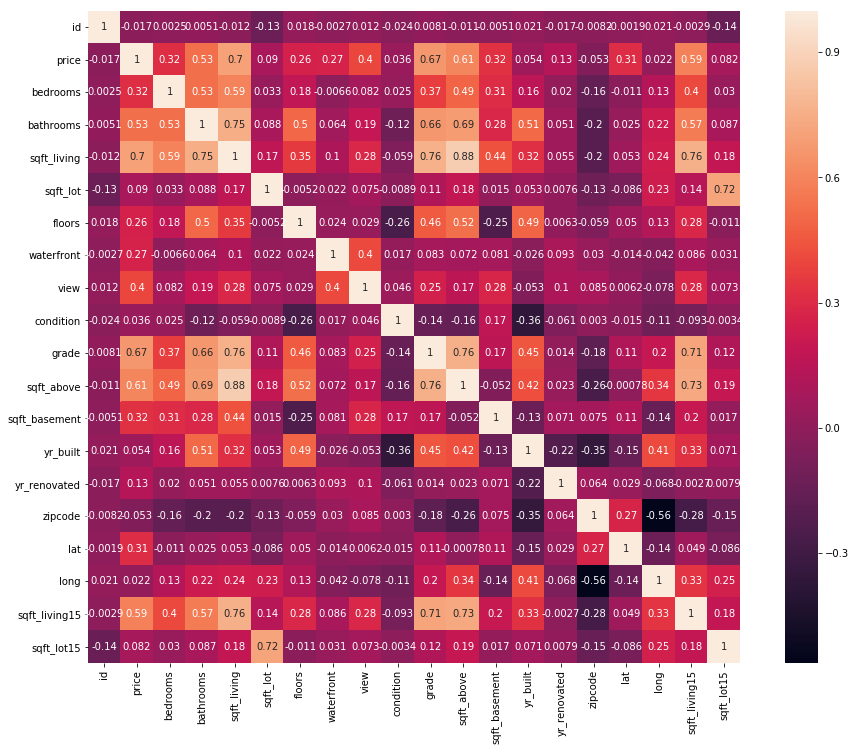

In [15]:
corrmat = house_df.corr()
ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, square=True, annot=True)

In [18]:
corrmat[['price']].sort_values(by=['price'], ascending=False)

,price
price,1.000000
sqft_living,0.702047
grade,0.667447
sqft_above,0.605591
sqft_living15,0.585404
bathrooms,0.525147
view,0.397299
sqft_basement,0.323812
bedrooms,0.315445
lat,0.306998


In [21]:
# Sort correlation matrix - technique from https://stackoverflow.com/a/17778786
corr_unstack = corrmat.unstack()
corr_sorted = corr_unstack.sort_values(kind='quicksort')
corr_sorted.head(20)

zipcode        long            -0.564065
long           zipcode         -0.564065
yr_built       condition       -0.361380
condition      yr_built        -0.361380
zipcode        yr_built        -0.346859
yr_built       zipcode         -0.346859
zipcode        sqft_living15   -0.279020
sqft_living15  zipcode         -0.279020
condition      floors          -0.263706
floors         condition       -0.263706
sqft_above     zipcode         -0.261177
zipcode        sqft_above      -0.261177
sqft_basement  floors          -0.245684
floors         sqft_basement   -0.245684
yr_built       yr_renovated    -0.224885
yr_renovated   yr_built        -0.224885
bathrooms      zipcode         -0.203858
zipcode        bathrooms       -0.203858
sqft_living    zipcode         -0.199421
zipcode        sqft_living     -0.199421
dtype: float64

In [22]:
corr_sorted.tail(60)

bathrooms      yr_built         0.506012
yr_built       bathrooms        0.506012
sqft_above     floors           0.523866
floors         sqft_above       0.523866
price          bathrooms        0.525147
bathrooms      price            0.525147
bedrooms       bathrooms        0.529159
bathrooms      bedrooms         0.529159
sqft_living15  bathrooms        0.568628
bathrooms      sqft_living15    0.568628
price          sqft_living15    0.585404
sqft_living15  price            0.585404
sqft_living    bedrooms         0.591467
bedrooms       sqft_living      0.591467
sqft_above     price            0.605591
price          sqft_above       0.605591
bathrooms      grade            0.664979
grade          bathrooms        0.664979
               price            0.667447
price          grade            0.667447
bathrooms      sqft_above       0.685339
sqft_above     bathrooms        0.685339
sqft_living    price            0.702047
price          sqft_living      0.702047
grade          s

# Heatmap & Correlation observations
The columns with the highest correlation with price are in order are: sqft_living, grade, sqft_above, sqft_living15, bathrooms, view, sqft_basement, and bedrooms
The house size columns are closely correlated with each other. Particuarly, sqft_living with sqft_above, sqft_living with sqft_living15
The Sqft_living is closely correlated with both grade and number of bathrooms.
Year built is negatively correlated with condition.
There is a slight negative correlation between zipcode both sqft_living and year built.

Pairplots

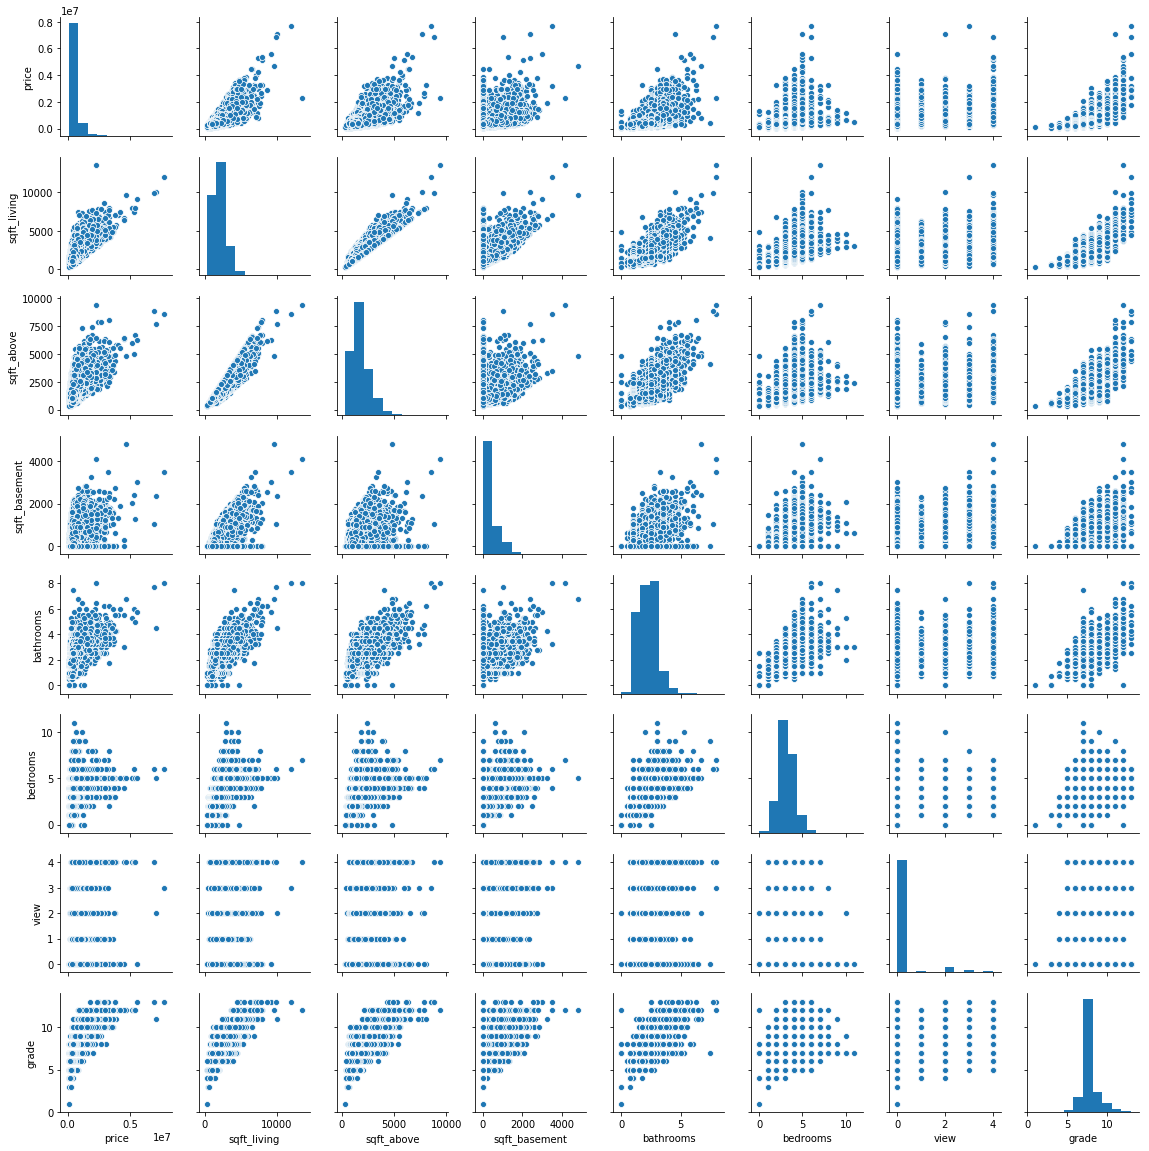

In [24]:
pair_cols = ['price', 'sqft_living', 'sqft_above', 'sqft_basement', 'bathrooms', 'bedrooms', 'view', 'grade']
sns.pairplot(house_df.loc[:, pair_cols], height=2)
             

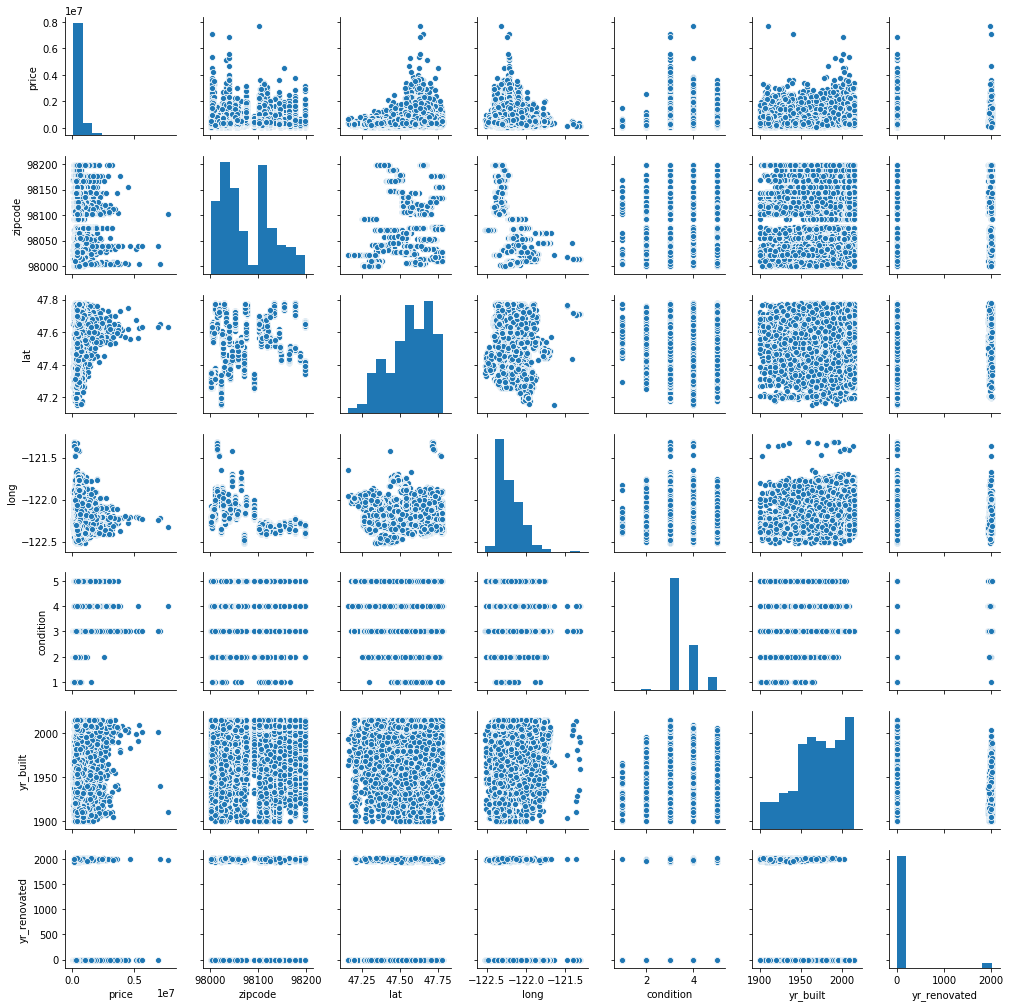

In [25]:
pair_cols = ['price', 'zipcode', 'lat', 'long', 'condition', 'yr_built', 'yr_renovated']
sns.pairplot(house_df.loc[:, pair_cols], height=2)

Pairplot oberservations

There appear to be a couple outliers skewing the ranges of the plots. In particular, bedrooms is the worst but price and sqft_living also seem to have some as well. The outlier in bedroom was removed (see comment above) and the plots were recomputed.
Square feet, bedrooms, bathrooms, and grade show nice looking plots

Boxplots

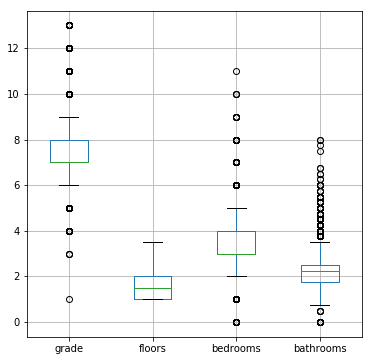

In [26]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 
house_df.loc[:,['grade', 'floors', 'bedrooms', 'bathrooms']].boxplot(ax = ax)

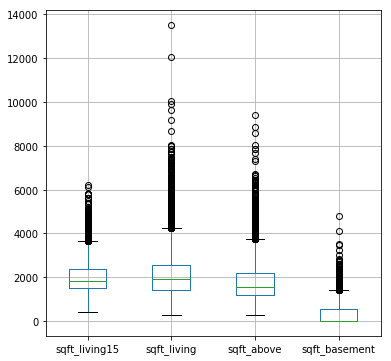

In [28]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis
house_df.loc[:,['sqft_living15', 'sqft_living', 'sqft_above', 'sqft_basement']].boxplot(ax=ax)


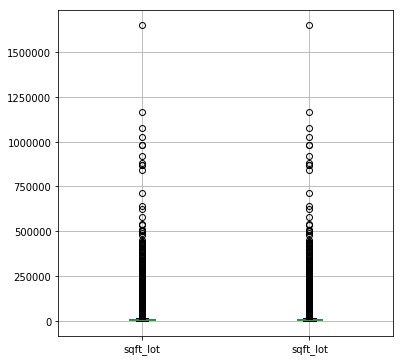

In [29]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis
house_df.loc[:,['sqft_lot', 'sqft_lot']].boxplot(ax = ax)

Boxplot Observations

The square foot columns have means in the middle of their quartiles, with whiskers that are also roughly the same length.
For the square foot columns there are a large number of outliers above the top whisker.
The mean of bedrooms, bathrooms, and floors seems to fall in the range of of 1.5 - 3

PDF/Histograms

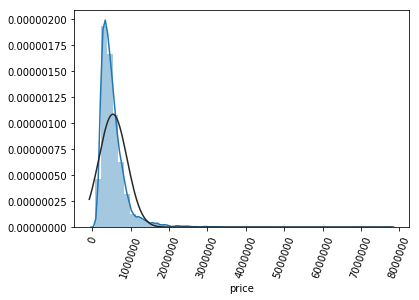

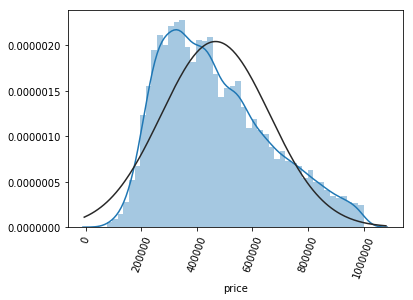

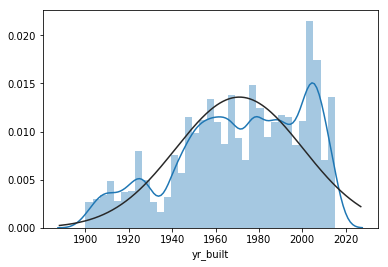

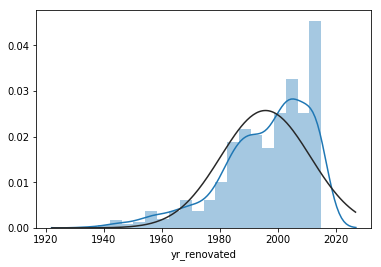

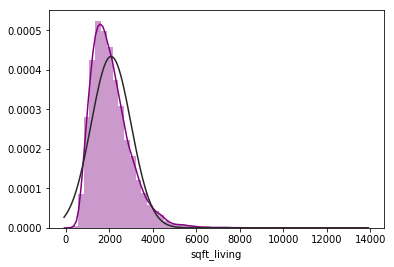

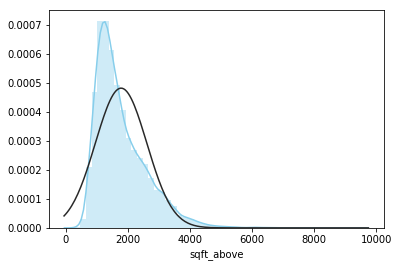

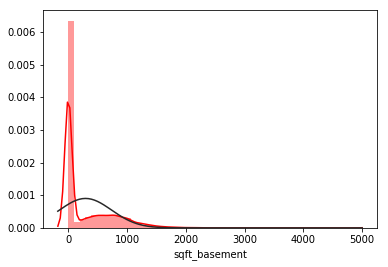

In [30]:
# all house prices
sns.distplot(house_df.loc[:, 'price'], fit=stats.norm);
plt.xticks(rotation=70)
plt.show();

# house prices < 1 million
sns.distplot(house_df.loc[house_df['price'] < 1000000, 'price'], fit=stats.norm);
plt.xticks(rotation=70)
plt.show();


# year built
sns.distplot(house_df.loc[:, 'yr_built'], fit=stats.norm);
plt.show();

# year renovated
sns.distplot(house_df.loc[house_df['yr_renovated'] > 1, 'yr_renovated'], fit=stats.norm);
plt.show();

# livable space
sns.distplot(house_df.loc[:, 'sqft_living'], color='purple', label='Sqft Living', fit=stats.norm);
plt.show();
sns.distplot(house_df.loc[:, 'sqft_above'], color='skyblue', label='Sqft Above', fit=stats.norm);
plt.show();
sns.distplot(house_df.loc[:, 'sqft_basement'], color='red', label='Sqft Basement', fit=stats.norm);
plt.show();

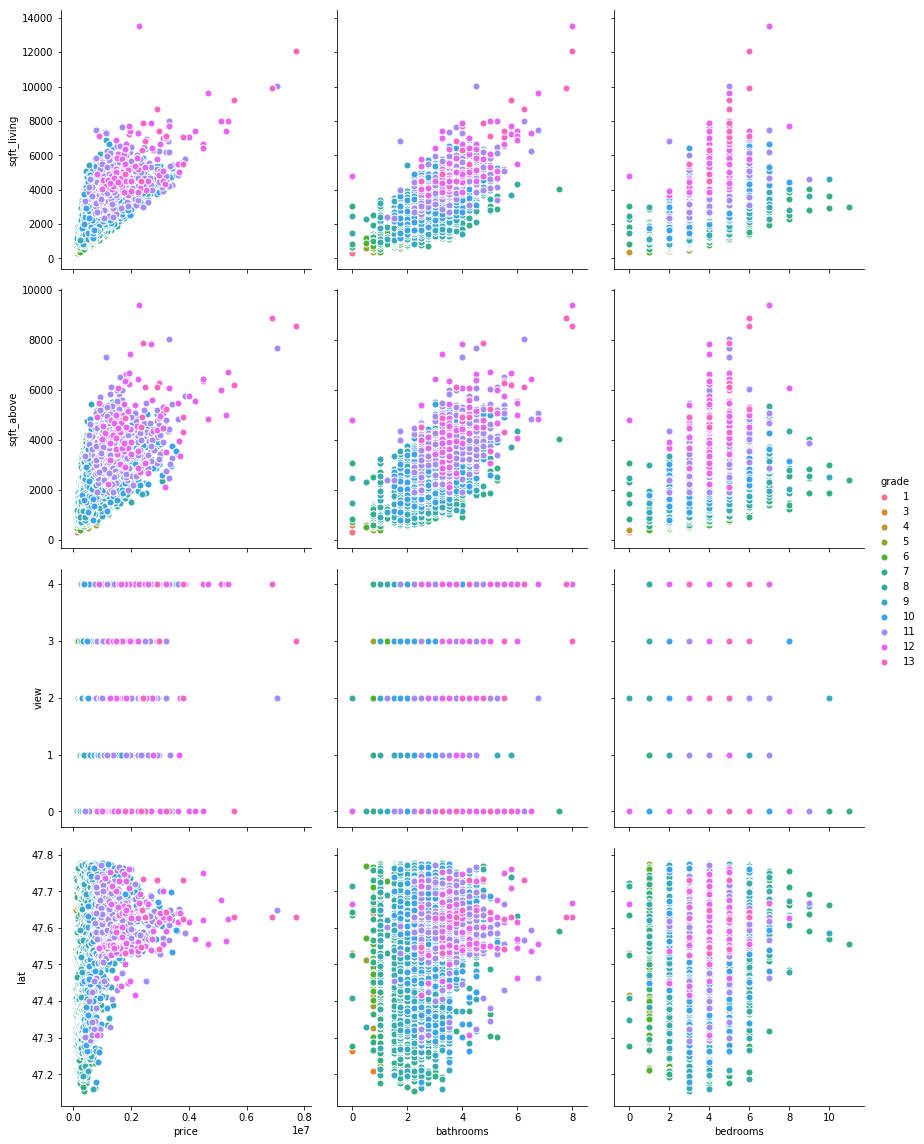

In [31]:
g = sns.PairGrid(house_df, x_vars=["price", "bathrooms", "bedrooms"], y_vars=["sqft_living", "sqft_above", "view", "lat"], height=4, hue="grade")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend();

Conclusions

Problem: A developer interest in acquiring properties in King County Washington is interested in what home features (zip code, structure, and so on) would yield a high price.
Solution: The features that contribute most to high price are the livable square feet with a correlation of 0.702, the grade with a correlation of 0.667, a large number of bahtrooms with a 0.525, and a view 0.397.